<a href="https://colab.research.google.com/github/mrrk8879/Classification---Health-Insurance-Cross-Sell-Prediction-Capstone---End-to-End-Machine-Learning/blob/main/Final_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Classification - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** - Mohammed Rihan Khan


# **Project Summary -**

###**Introduction**
In the competitive insurance industry, cross-selling additional insurance products to existing customers is a strategic approach to increase revenue and improve customer retention. Our client, a health insurance company, aims to predict whether their current health insurance policyholders will be interested in purchasing vehicle insurance. This project involves building a robust machine learning model to assist the company in targeting customers more effectively, optimizing their marketing strategies, and enhancing overall business performance.

###**Business Context**
Health and vehicle insurance are two primary products offered by the client. While health insurance covers medical expenses, vehicle insurance provides coverage for damages incurred due to vehicle accidents. Understanding which health insurance customers are likely to purchase vehicle insurance can significantly enhance the company's cross-selling efforts.

###**Data Overview**
The dataset comprises 381,109 records with 12 features:

**Demographic Information:** Gender, Age, Region Code.

**Vehicle Information:** Vehicle Age, Vehicle Damage.

**Policy Information:** Annual Premium, Policy Sales Channel, Vintage.

**Others:** Driving License, Previously Insured, Response (target variable)

# **GitHub Link -**

https://github.com/mrrk8879/Classification---Health-Insurance-Cross-Sell-Prediction-Capstone---End-to-End-Machine-Learning

# **Problem Statement**


In the competitive landscape of the insurance industry, retaining existing customers and maximizing their lifetime value is crucial for business growth. Our client, a health insurance provider, is looking to expand its product offerings by cross-selling vehicle insurance to its current health insurance policyholders. The challenge is to identify which health insurance customers are most likely to purchase vehicle insurance, thereby allowing the company to target its marketing efforts more effectively and efficiently.

Currently, the company lacks a systematic approach to predict customer interest in additional insurance products. This results in inefficient marketing strategies, increased customer acquisition costs, and missed opportunities for revenue growth. To address this, we aim to develop a predictive model that can accurately identify customers who are likely to be interested in purchasing vehicle insurance based on their demographic, vehicle, and policy information.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr, ttest_ind

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df_insure = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df_insure.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
df_insure.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381099,381100,Female,51,1,28.0,0,1-2 Year,Yes,44504.0,26.0,71,0
381100,381101,Female,29,1,28.0,0,< 1 Year,Yes,49007.0,124.0,137,0
381101,381102,Female,70,1,28.0,0,> 2 Years,Yes,50904.0,122.0,215,0
381102,381103,Female,25,1,41.0,1,< 1 Year,Yes,2630.0,152.0,102,0
381103,381104,Male,47,1,50.0,0,1-2 Year,Yes,39831.0,26.0,235,0
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_insure.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_insure.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_insure.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

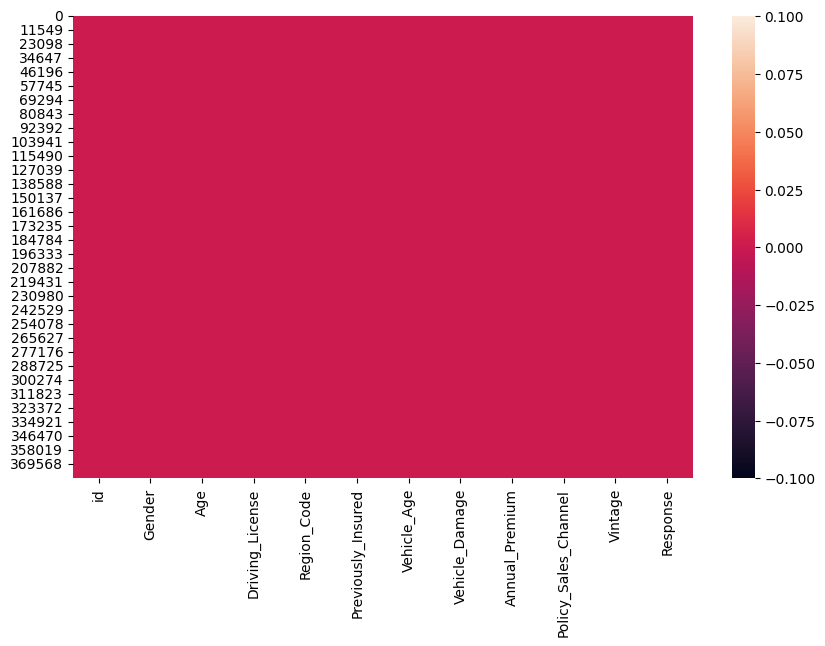

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_insure.isnull())

### What did you know about your dataset?

1. As we can see there are 12 columns a d 381109 rows in this dataset.
2. There is no any null value present in the dataset.
3. There is also no any duplicate value present in the dataset and each value is unique.
4. The target column is categorical column i.e. 0 for 'No' and 1 for 'Yes'.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_insure.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df_insure.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df_insure.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


### Variables Description

**id**: Unique identifier for each customer.

**Gender**: Gender of the customer.

**Age**: Age of the customer.

**Driving_License**: Whether the customer holds a driving license (0/1).

**Region_Code**: Region code of the customer.

**Previously_Insured**: Whether the customer previously had insurance (0/1).

**Vehicle_Age**: Age of the vehicle.

**Vehicle_Damage**: Whether the customer had any previous vehicle damage (Yes/No).

**Annual_Premium**: Amount paid for insurance annually.

**Policy_Sales_Channel**: Channel through which the policy was sold.

**Vintage**: Number of days the customer has been associated with the company.

**Response**: Target variable indicating interest in vehicle insurance (0/1).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df_insure.nunique())

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


In [ ]:
for col in df_insure.columns:
    print(f"{col}: {df_insure[col].unique()}")
    print("-" * 120)

id: [     1      2      3 ... 381107 381108 381109]
------------------------------------------------------------------------------------------------------------------------
Gender: ['Male' 'Female']
------------------------------------------------------------------------------------------------------------------------
Age: [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
------------------------------------------------------------------------------------------------------------------------
Driving_License: [1 0]
------------------------------------------------------------------------------------------------------------------------
Region_Code: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = df_insure.copy()

### What all manipulations have you done and insights you found?

Our data is already cleaned and has 0 null values and 0 duplicate values so here i am just copying my dataset into a new variable df so that if i make any changes in the dataset in did not change the original dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Plotting responce of the customer.

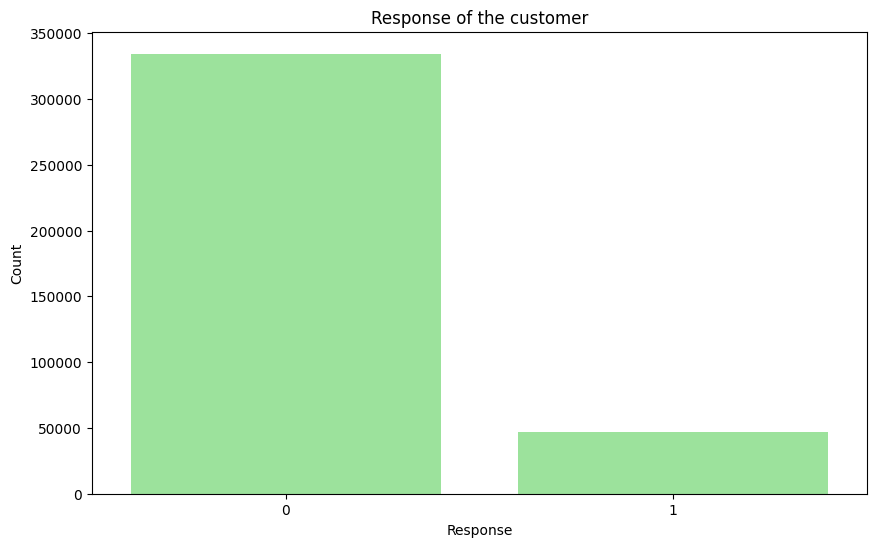

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = df['Response'], data = df, color= 'lightgreen')
plt.title('Response of the customer')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The rationale behind choosing this chart was to compare the count of positive and negative responce from the user.

##### 2. What is/are the insight(s) found from the chart?

As we can see the data is highly imbalanced and Most of the people not interested in purchasing the Insurance but out of 0.38 million users there are only upto 50,000 customer have bought the vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The growth is negative because we want maximum customers to buy our insurance.

#### Chart - 2 Let's compare the count of male and female in the dataset and there reponse for buying the insurance.

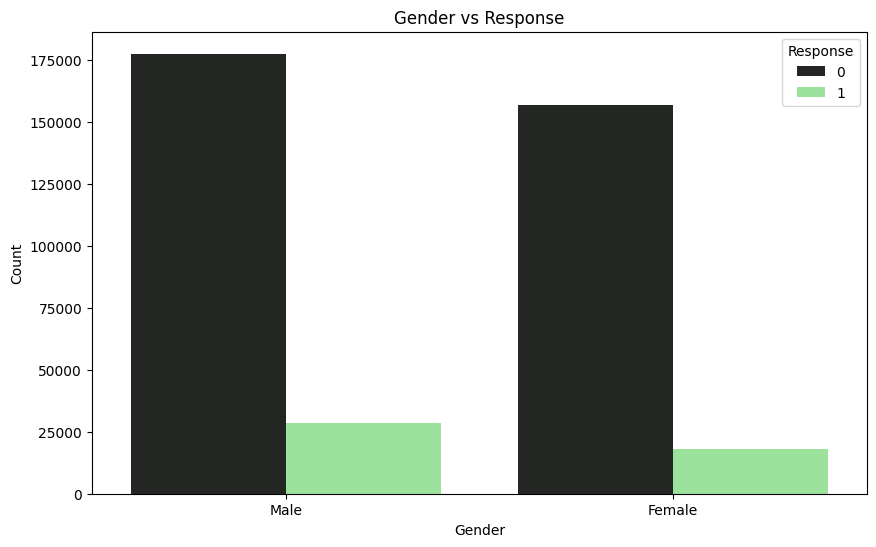

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = df['Gender'], hue = df['Response'], data = df, color= 'lightgreen')
plt.title('Gender vs Response')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Reason behind choosing this chart is to compare the count of male and there interest and female and there interest in buying the insurance.

##### 2. What is/are the insight(s) found from the chart?

Around 30,000 males have bought the insurance from about 1,75,000 of males from the dataset and around 20,000 of females have bought the insurance out of around 1,60,000 females in the dataset, so in conclusion male are more interested in having a car insurance as compared to female and if we calculate the ratio then also male ratio is more then the female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The growth is negative because if we see only 17-18% male and 12-13% females are interested in buying the vehicle insurance

#### Chart - 3 Now lets compare male and female vs responce.

Text(0, 0.5, 'Count')

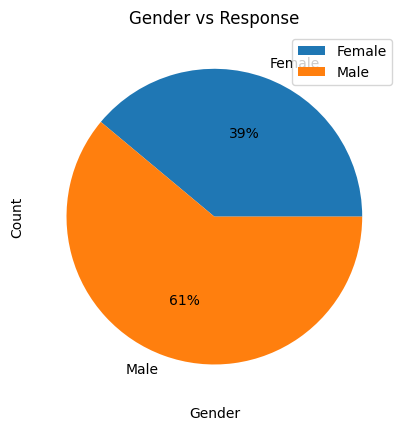

In [ ]:
# Chart - 3 visualization code
df.groupby(['Gender']).sum().plot(kind = 'pie',y = 'Response', autopct = '%1.0f%%')
plt.title('Gender vs Response')
plt.xlabel('Gender')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

I have choosen this chart to find the proportion of male and female in total responce

##### 2. What is/are the insight(s) found from the chart?

As we see in the plot there are 61% male and only 39% of females are there who showed the interenst in bying the insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is only 14-15% people are interested in byuing the insurance but out these two males are more interest, so we have to focus on female more and we have to make them more aware of the insurance policies and it's benefits and we also have to give the offers.

#### Chart - 4 DL vs Responce

Text(0.5, 1.0, 'DL vs Response')

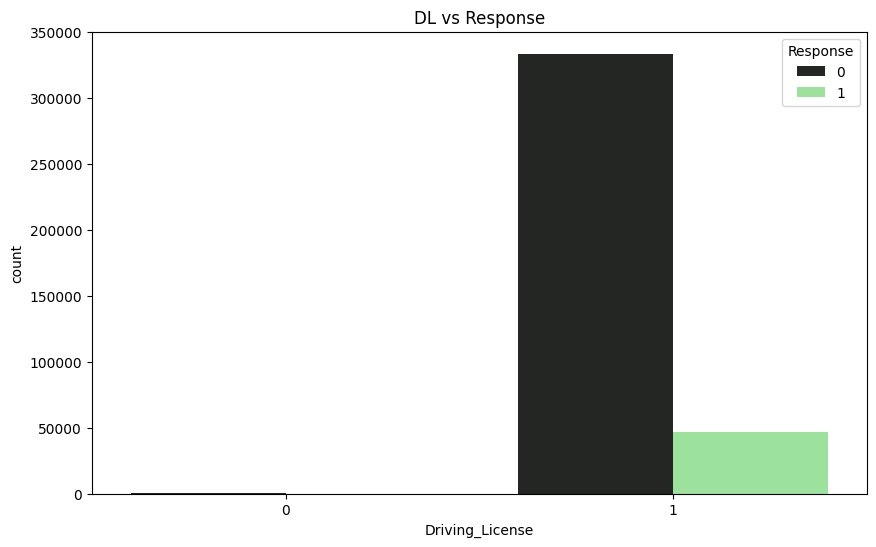

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = df['Driving_License'], hue = df['Response'], data = df, color= 'lightgreen')
plt.title('DL vs Response')

##### 1. Why did you pick the specific chart?

Here we are comparing the responce the who have DL and people who do not have DL along with there total count.

##### 2. What is/are the insight(s) found from the chart?

As we can see in the graph, people who do not have DL are not at all interested in byuing the Insurance and there are only few people in our dataset who do not have DL.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is possibilities that the person who do not have the DL also not have any vehicle and that is the reason why the arn't interested in having a vehicle insurance but we have to focus on the people who have DL because if we calcute the ratio there are very less people who are byuing our insurance.

#### Chart - 5 Priviously Insured People vs Responce.

Text(0.5, 1.0, 'Previously Insured vs Response')

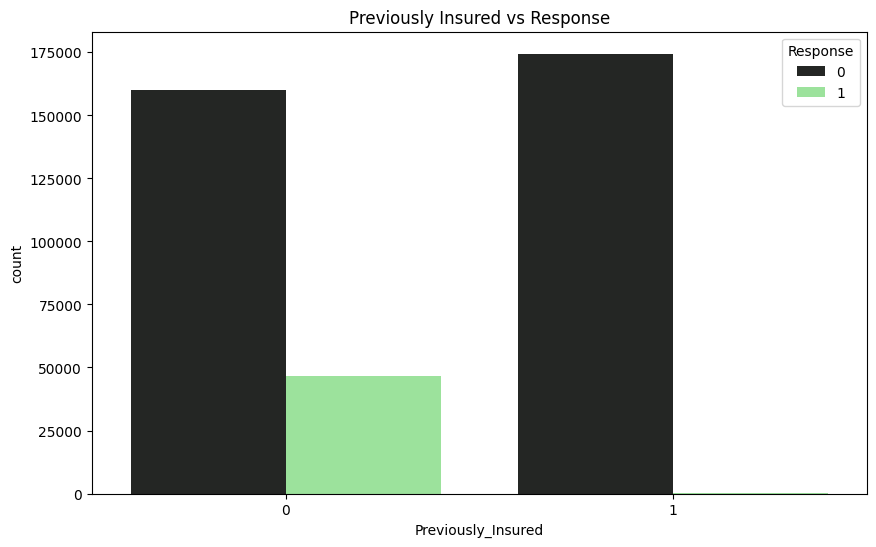

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = df['Previously_Insured'], hue = df['Response'], data = df, color= 'lightgreen')
plt.title('Previously Insured vs Response')

##### 1. Why did you pick the specific chart?

To Compare the number of people who are interested in byuing isurance or not.

##### 2. What is/are the insight(s) found from the chart?

There is very less people who was priviously insured have bought the insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We should made aware the poeple to have an insurance which will help them if they made with an accident.

#### Chart - 6 Responce of owners of vehilces based on the life of there vehilce.

Text(0.5, 1.0, 'Vehicle Age vs Response')

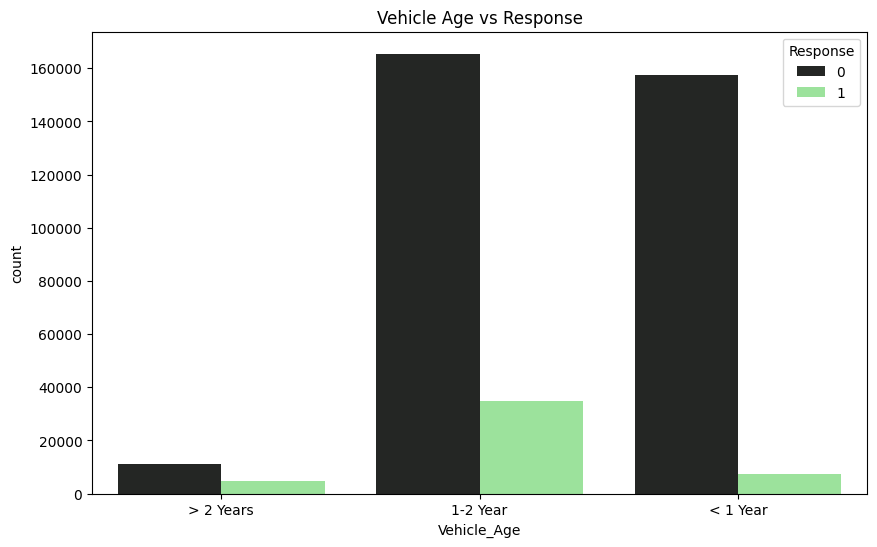

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = df['Vehicle_Age'], hue = df['Response'], data = df, color= 'lightgreen')
plt.title('Vehicle Age vs Response')

##### 1. Why did you pick the specific chart?

To compare the value count of Age of the vehicle vs the response.

##### 2. What is/are the insight(s) found from the chart?

If we see the ratio then the poeple whose vahicle's age is more then 2 years is more, almost 50% people bought the vehicle insurance but if we compare the number the number then vehicle with age between 1-2 years are more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People who are buying a new vehicle are not purchasing insurance much, we have to tell them the importance of buying an insurance in case if there new vahicle met with an accident

#### Chart - 7 Age of Customer vs Responce.

Text(0.5, 1.0, 'Age vs Response')

<Figure size 1000x600 with 0 Axes>

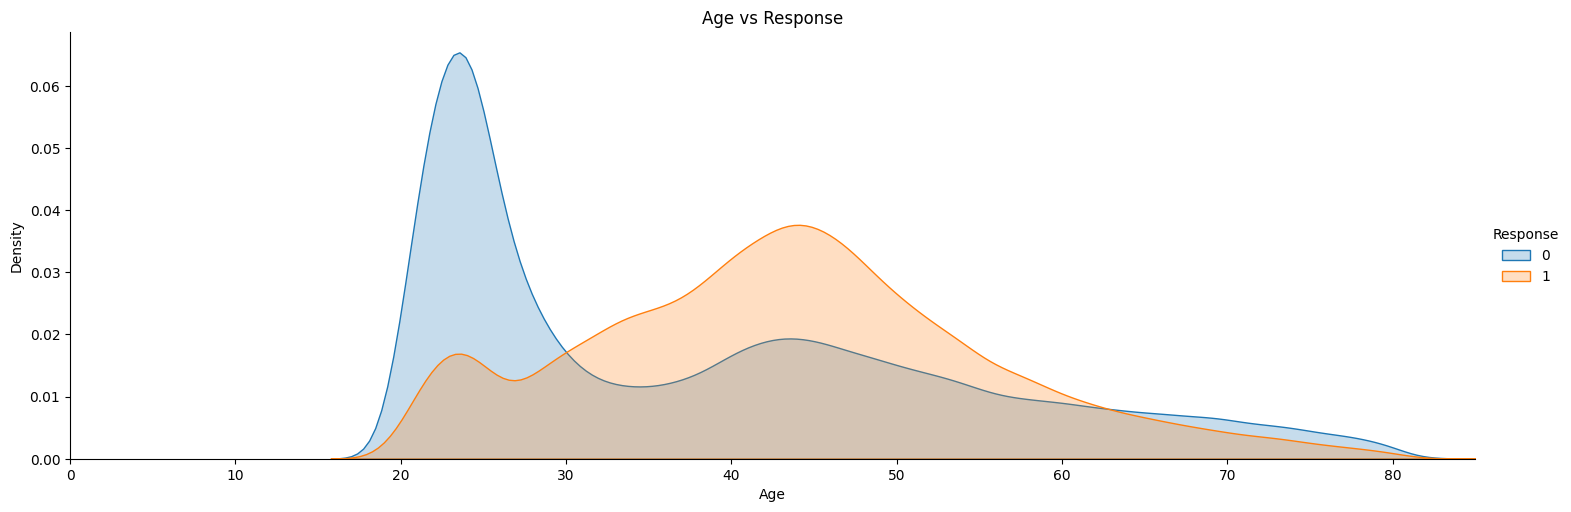

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10,6))
sns.FacetGrid(df, hue = 'Response', height = 5, aspect=3).map(sns.kdeplot, 'Age', shade = True).add_legend().set(xlim = (0, df['Age'].max()))
plt.title('Age vs Response')

##### 1. Why did you pick the specific chart?

I have choosen a KDE plot for visualizing the age of customers vs. response because it effectively shows the distribution and density of ages for each response category, making it easy to compare patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

People with age between 40-50 buy the insurance more and then the curve starts decreasing from there gradualy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The responce of the insurance could be because of lack of experience, less meturity level or they don't have expensive vehicles.

#### Chart - 8 Distribution of Annual Premium

Text(0.5, 1.0, 'Distribution of Annual Premium')

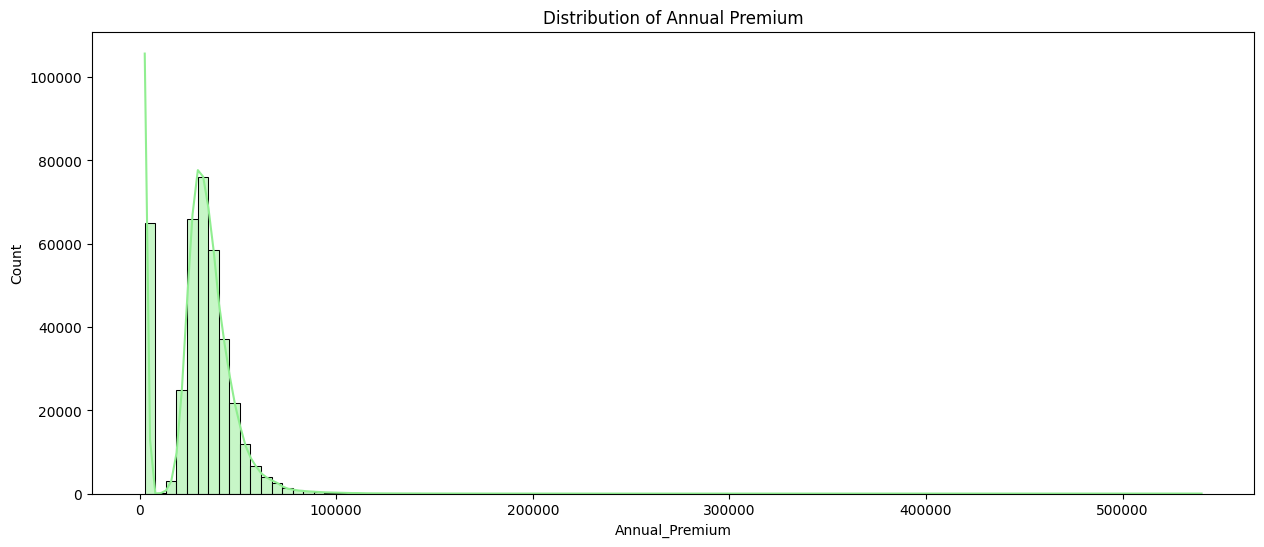

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,6))
sns.histplot(df['Annual_Premium'], bins=100, kde=True, color='lightgreen')
plt.title('Distribution of Annual Premium')

##### 1. Why did you pick the specific chart?

Choose this chart to see the distribution of the annual premium amount data.

##### 2. What is/are the insight(s) found from the chart?

The data is havily right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

THere are some outliers present in the data.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Let's take dataset which have numerical values only.
numerical_df = df.select_dtypes(include=['number'])
numerical_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


Text(0.5, 1.0, 'Correlation Heatmap')

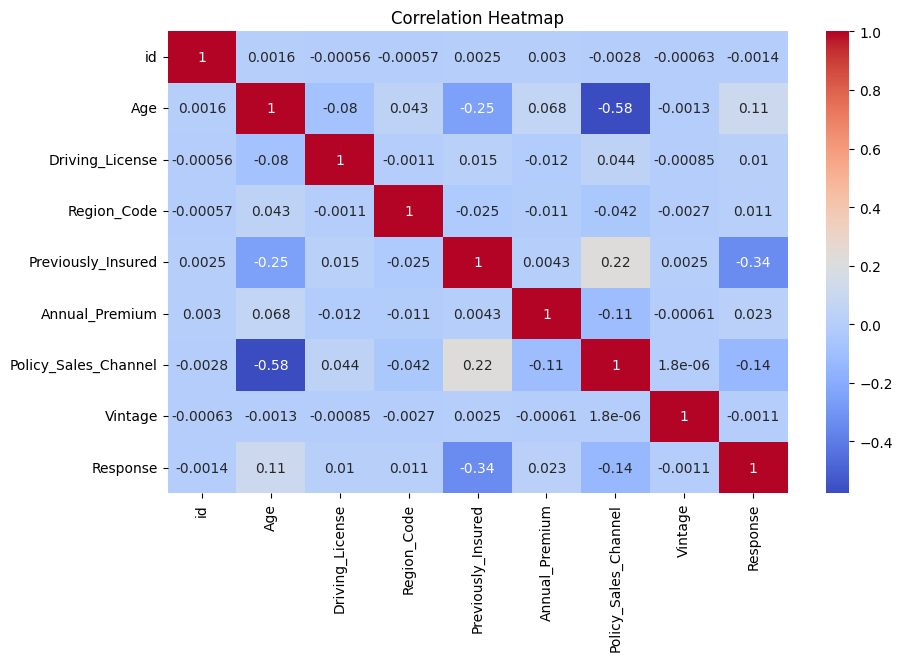

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

##### 1. Why did you pick the specific chart?

I have choosen this  chart to find the correlation between the numerical variables, this chart shows the correlation and also the strength of the correlation.

##### 2. What is/are the insight(s) found from the chart?

The variable id and vintage did not have good correlation with responce variable so we can drop these variables.

#### Chart - 15 - Pair Plot

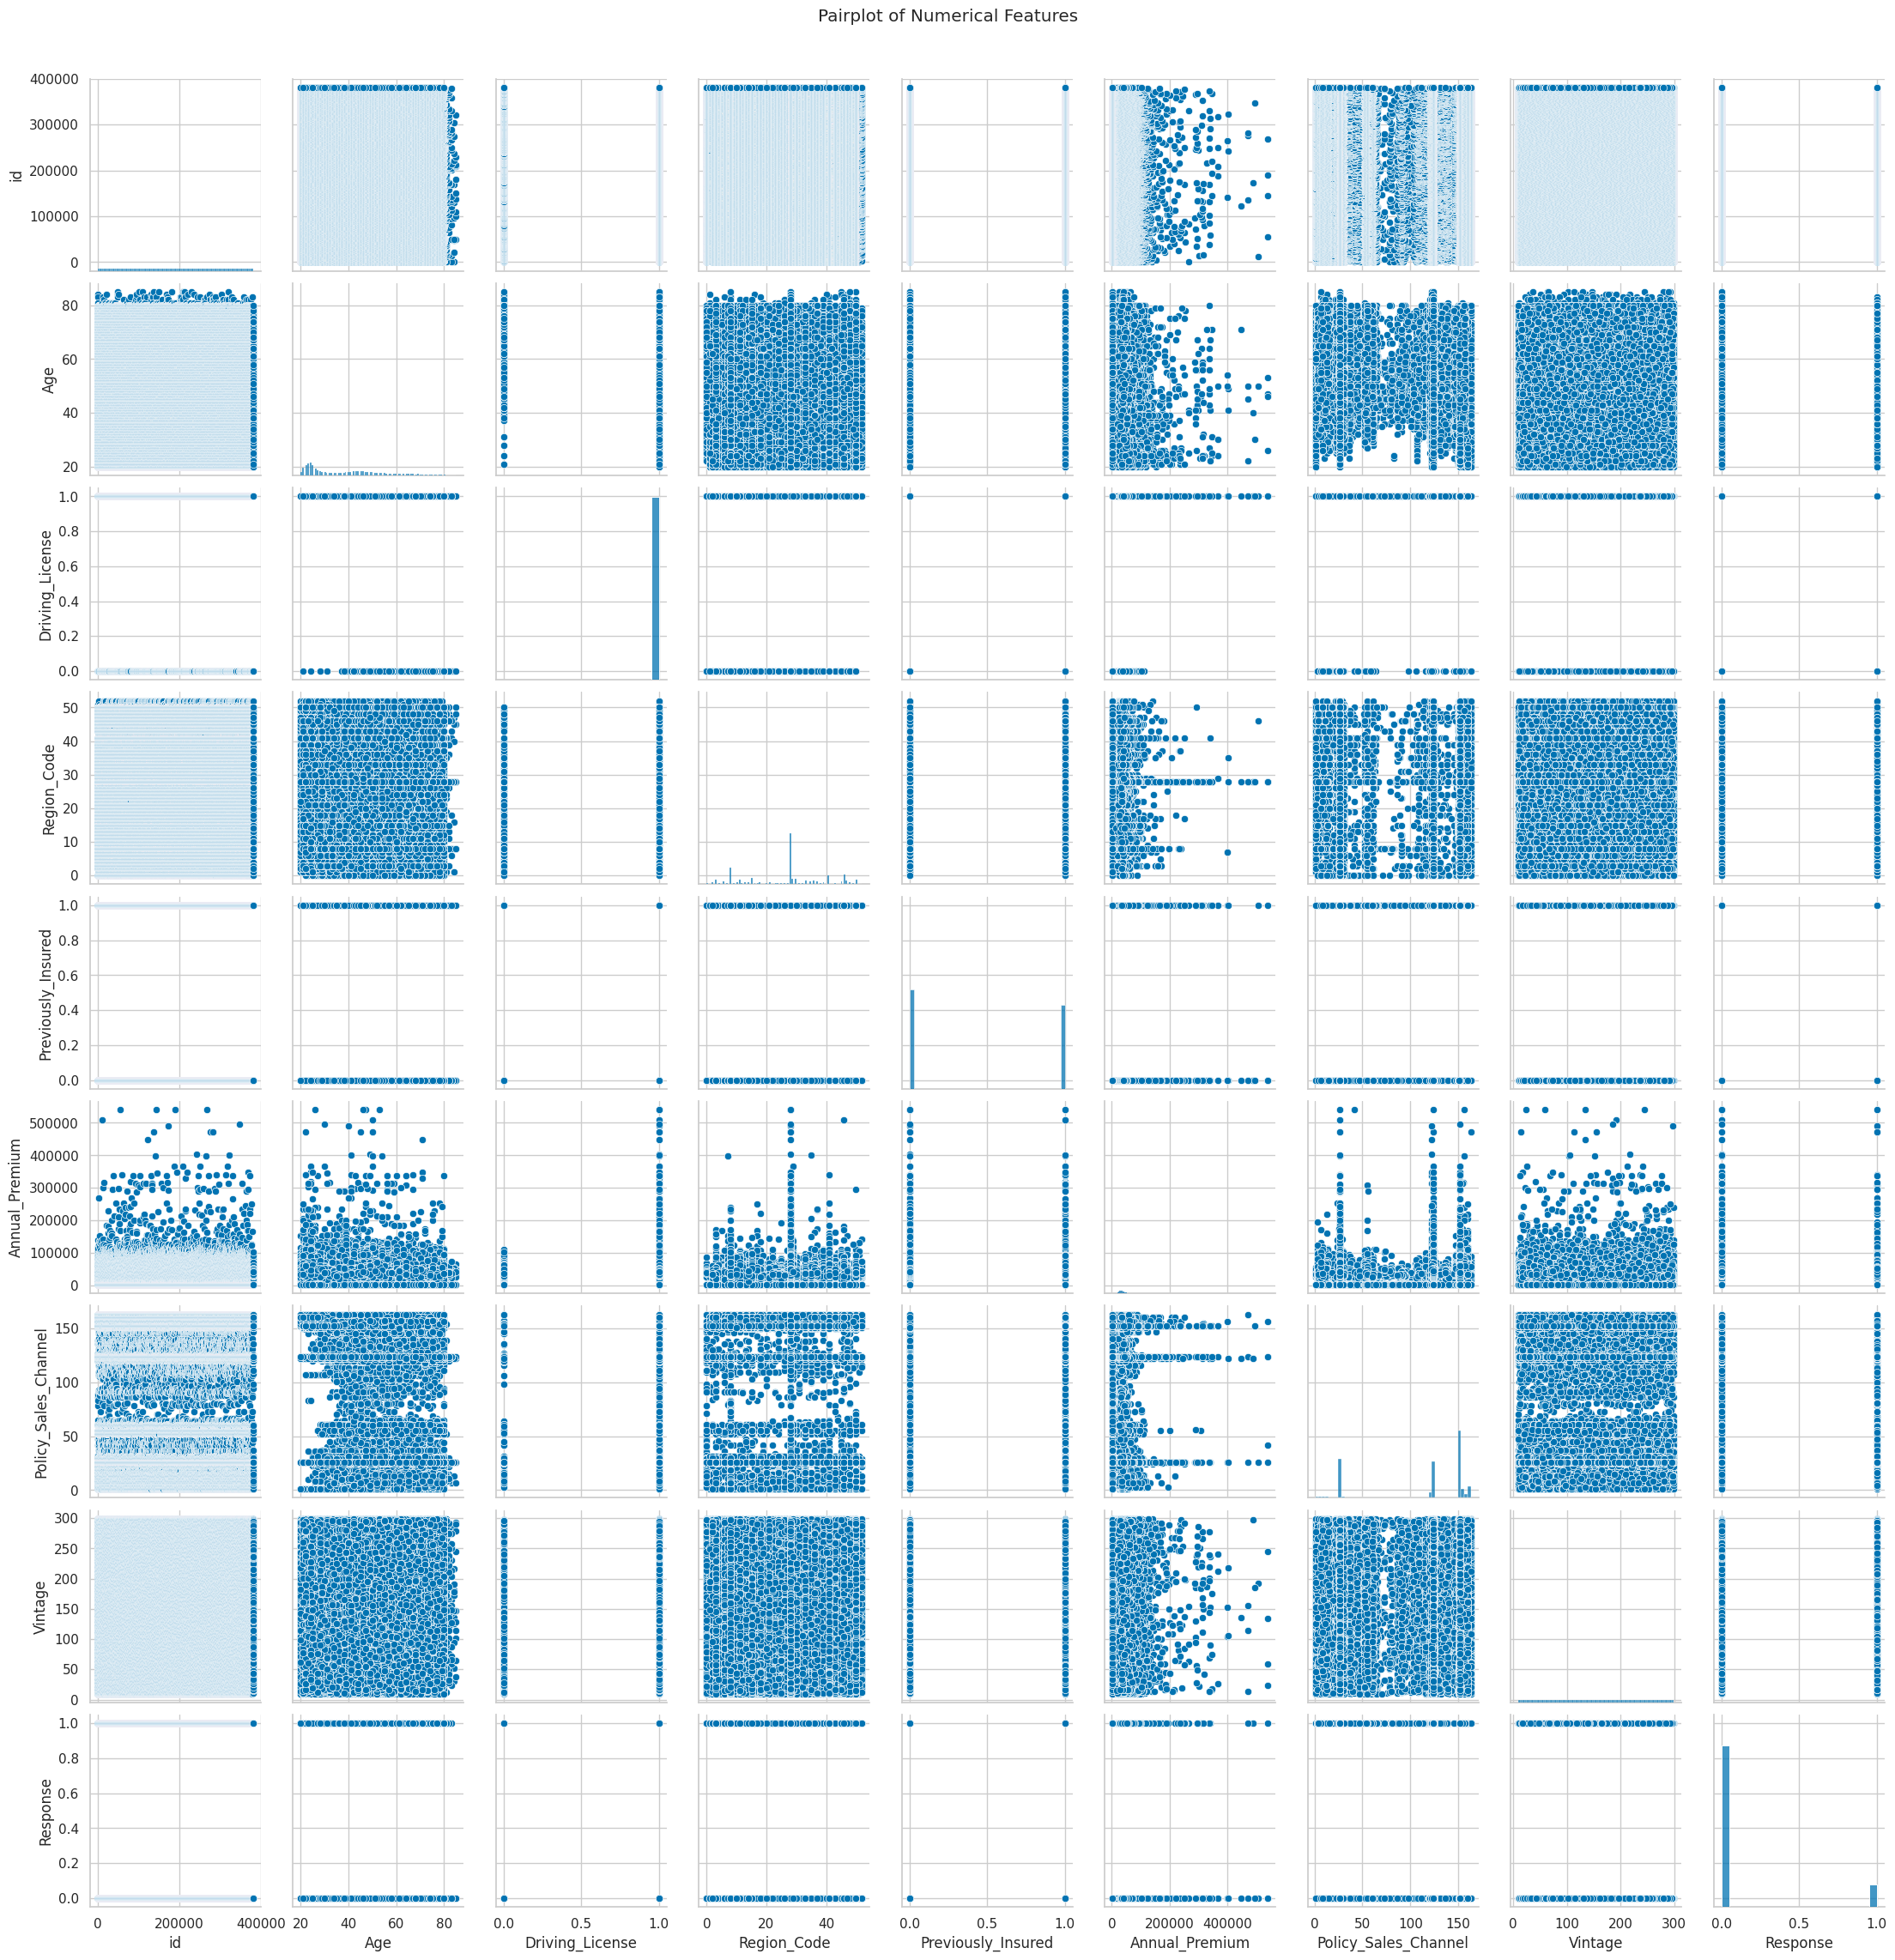

In [ ]:
# Pair Plot visualization code
sns.set(style="whitegrid", palette="colorblind")
pairplot = sns.pairplot(numerical_df)

# Add titles and labels
pairplot.fig.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot can be used to see the distribution of variable as well as relation between all the other varibles in the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

I have chhosen these 3 topics to test hypothesis which is listed below,

#### **Gender and Response Rate:**

**Null Hypothesis (H0)**: There is no effect of gender on the interest in vehicle insurance. The proportion of interested customers is the same across genders.

**Alternative Hypothesis (H1)**: Gender affects the interest in vehicle insurance. The proportion of interested customers differs across genders.

**Test**: Chi-square test for independence.

#### **Age and Annual Premium:**

**Null Hypothesis (H0)**: There is no relationship between age and annual premium.

**Alternative Hypothesis (H1)**: There is a relationship between age and annual premium.

**Test:** Pearson correlation test.


#### **Vehicle Age and Response:**

**Null Hypothesis (H0)**: The interest in vehicle insurance is independent of vehicle age.


**Alternative Hypothesis (H1):** The interest in vehicle insurance depends on vehicle age.

**Test**: Chi-square test for independence.

### Hypothetical Statement - 1 Gender and Response Rate

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: Gender does not affect the interest in vehicle insurance.

**Alternative Hypothesis (H1)**: Gender affects the interest in vehicle insurance.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table_gender = pd.crosstab(df['Gender'], df['Response'])

# Perform the chi-square test
chi2, p_gender, dof, ex = chi2_contingency(contingency_table_gender)

# Display the results
print("Chi-square test statistic (Gender):", chi2)
print("p-value (Gender):", p_gender)

# Interpret the p-value
alpha = 0.05
if p_gender < alpha:
    print("Reject the null hypothesis. There is an association between Gender and Response.")
else:
    print("Fail to reject the null hypothesis. There is no association between Gender and Response.")


Chi-square test statistic (Gender): 1047.7077577887574
p-value (Gender): 7.665800628415621e-230
Reject the null hypothesis. There is an association between Gender and Response.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this case is the Chi-square test of independence.

##### Why did you choose the specific statistical test?

Because this test is used to determine if there is a significant association between two categorical variables.

### Hypothetical Statement - 2 Age and Annual Premium

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between age and annual premium.

**Alternative Hypothesis (H1)**: There is a relationship between age and annual premium.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
correlation_age_premium, p_age_premium = pearsonr(df['Age'], df['Annual_Premium'])
print("Pearson correlation coefficient (Age vs. Annual Premium):", correlation_age_premium)
print("p-value (Age vs. Annual Premium):", p_age_premium)
if p_age_premium < alpha:
    print("Reject the null hypothesis. There is a relationship between Age and Annual Premium.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between Age and Annual Premium.")


Pearson correlation coefficient (Age vs. Annual Premium): 0.06750700155669288
p-value (Age vs. Annual Premium): 0.0
Reject the null hypothesis. There is a relationship between Age and Annual Premium.


##### Which statistical test have you done to obtain P-Value?

Pearson correlation test

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient measures the linear relationship between two continuous variables (in this case, Age and Annual Premium). It quantifies the strength and direction of their association.

### Hypothetical Statement - 3 Vehicle Age and Response:

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: The interest in vehicle insurance is independent of vehicle age.

**Alternative Hypothesis (H1)**: The interest in vehicle insurance depends on vehicle age.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
contingency_table_vehicle_age = pd.crosstab(df['Vehicle_Age'], df['Response'])
chi2_vehicle_age, p_vehicle_age, dof_vehicle_age, ex_vehicle_age = chi2_contingency(contingency_table_vehicle_age)
print("Chi-square test statistic (Vehicle Age):", chi2_vehicle_age)
print("p-value (Vehicle Age):", p_vehicle_age)
if p_vehicle_age < alpha:
    print("Reject the null hypothesis. There is an association between Vehicle Age and Response.")
else:
    print("Fail to reject the null hypothesis. There is no association between Vehicle Age and Response.")


Chi-square test statistic (Vehicle Age): 18771.889904151052
p-value (Vehicle Age): 0.0
Reject the null hypothesis. There is an association between Vehicle Age and Response.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this case is the Chi-square test of independence.

##### Why did you choose the specific statistical test?

Because this test is used to determine if there is a significant association between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There isn't any missing value present in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df1 = df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]

<Axes: xlabel='Annual_Premium'>

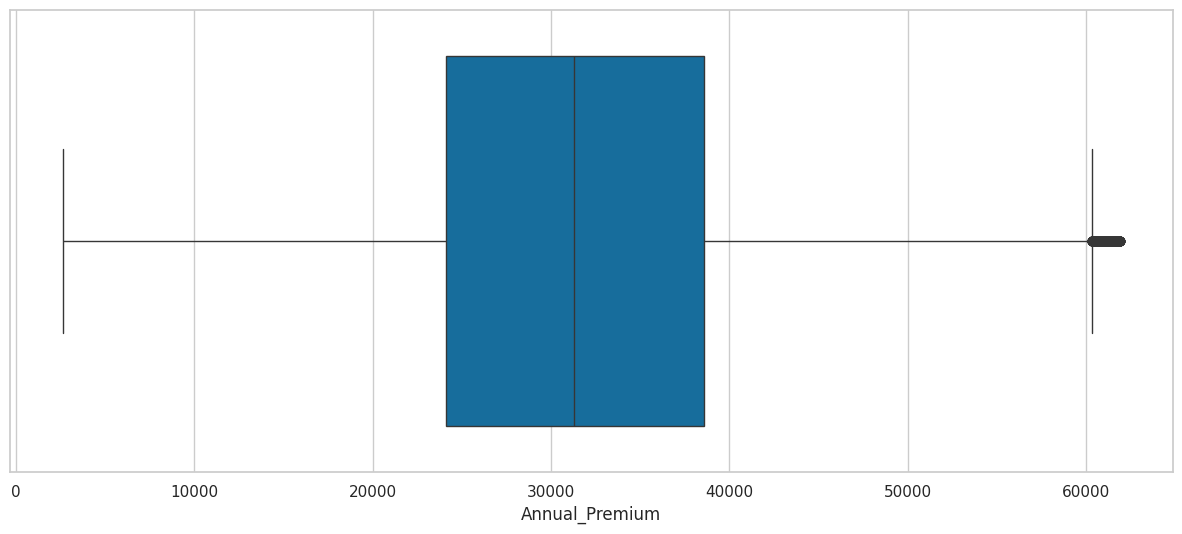

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df1['Annual_Premium'])

Text(0.5, 1.0, 'Distribution of Annual Premium')

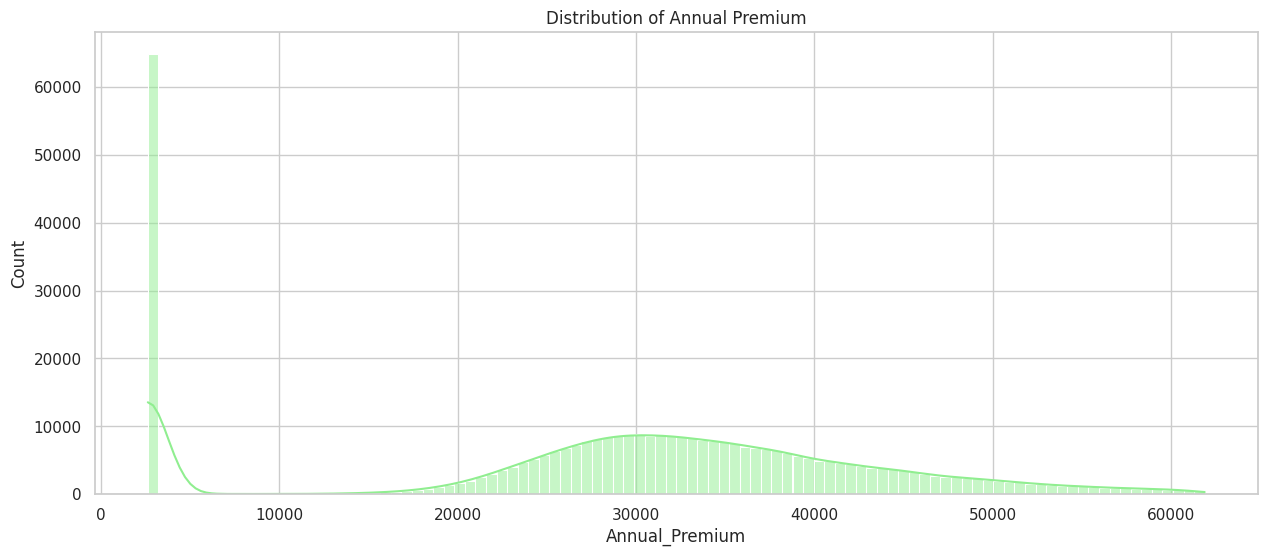

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,6))
sns.histplot(df1['Annual_Premium'], bins=100, kde=True, color='lightgreen')
plt.title('Distribution of Annual Premium')

In [ ]:
df.shape[0] - df1.shape[0]

10320

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used IQR method to remove the outliers, there were 10320 outliers present in the dataset, but there may be a possibilities that these are not the outliers but are the real datapoints of rare cases and by removing them we may loose some important information.
In conclusion, i'll not remove it but i'll transform my data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Define the mappings for the ordinal encoder
mappings = [
    {'col': 'Gender', 'mapping': {'Male': 0, 'Female': 1}},
    {'col': 'Vehicle_Age', 'mapping': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}},
    {'col': 'Vehicle_Damage', 'mapping': {'Yes': 1, 'No': 0}}
]

# Apply ordinal encoding
ordinal_encoder = ce.OrdinalEncoder(mapping=mappings)
df = ordinal_encoder.fit_transform(df)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here i have used Ordinal Encoding because i want to assign values in a sequence wherein in Label Encoder it assigns 0 for the 1st category it encounters and 1 for next unique category it encounters in the data and so on, so for column Vahicle age i want to assign 0 for newest vehicles and 1 for mid aged and 2 for old and that is why i used Ordinal Encoding technique.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
X = df.drop(['Response'], axis=1)
y = df['Response']

#### 1. Feature Selection

id                      0.193155
Vintage                 0.187050
Annual_Premium          0.163494
Age                     0.136953
Region_Code             0.095646
Vehicle_Damage          0.073289
Policy_Sales_Channel    0.068182
Previously_Insured      0.057206
Vehicle_Age             0.018251
Gender                  0.006295
Driving_License         0.000478
dtype: float64


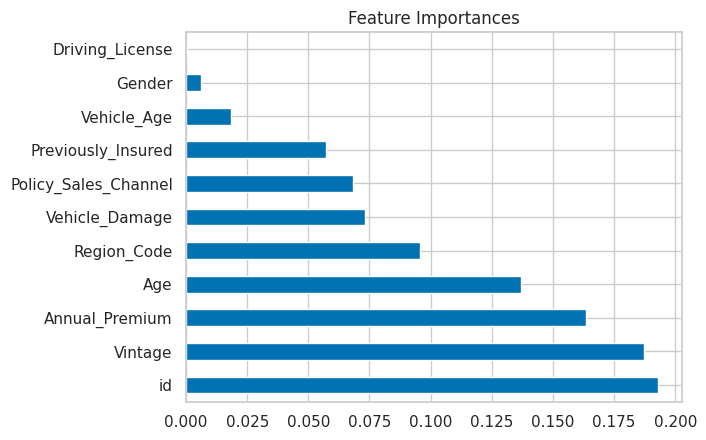

In [ ]:
# Select your features wisely to avoid overfitting
etc_model = ExtraTreesClassifier()
etc_model.fit(X, y)
feature_importances = etc_model.feature_importances_
feature_importances = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

                 Feature  Importance
3        Driving_License    0.000459
1                 Gender    0.012321
6            Vehicle_Age    0.020766
9   Policy_Sales_Channel    0.055740
5     Previously_Insured    0.056698
7         Vehicle_Damage    0.068565
4            Region_Code    0.087248
2                    Age    0.120019
8         Annual_Premium    0.173206
10               Vintage    0.192474
0                     id    0.212503


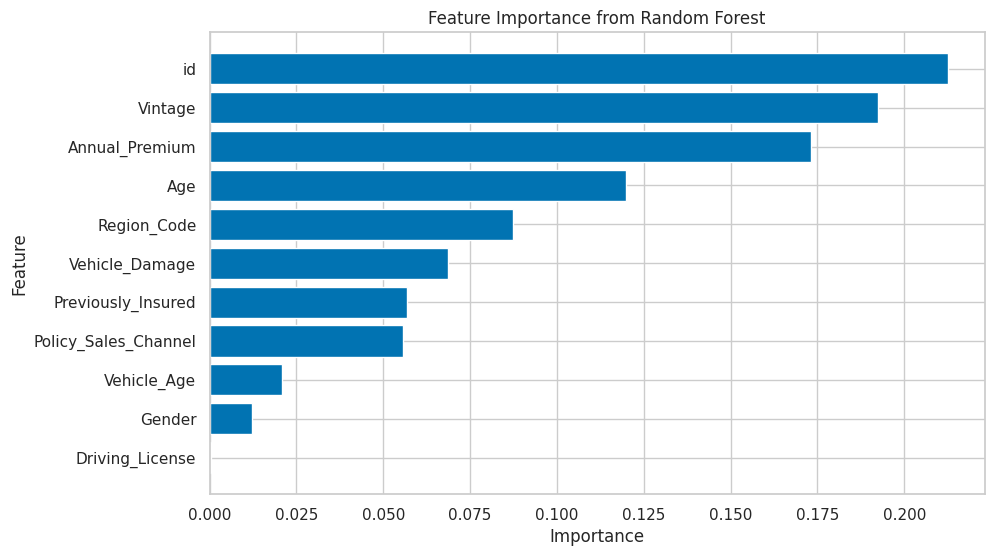

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
df.drop(['id', 'Driving_License', 'Gender', 'Vehicle_Age'], axis=1, inplace=True)

##### What all feature selection methods have you used  and why?

Tree-based models like Random Forests and Extra Tree Classifiers are naturally compute feature importance as part of the model training process, making it straightforward to extract.

##### Which all features you found important and why?

I have dropped the Driving Licence, Gender and vehicle age because they were not very important for classifying the dependent variable and which have importance less then 0.025.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the annual premium column needs to be transformed because it was skewed to the right side, and here i am using log transformation which is best skewed data.

<Axes: >

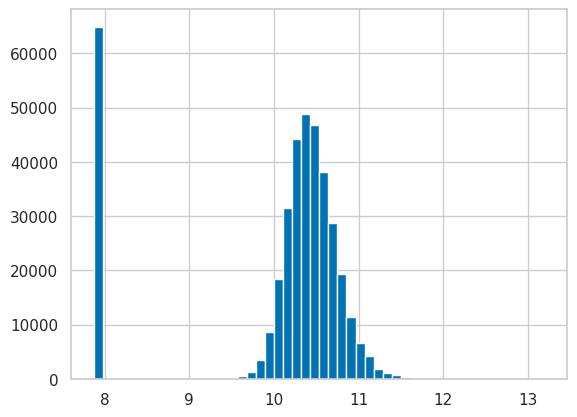

In [ ]:
from math import log
# Transform Your data
df['Annual_Premium'] = np.log(df['Annual_Premium'])
df['Annual_Premium'].hist(bins = 50)

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']])
df[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']] = df_scaled
df.head()

,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.333777,0.121784,0,1,0.590228,-1.587234,0.748795,1
1,2.396751,-1.767879,0,0,0.403629,-1.587234,0.342443,0
2,0.527181,0.121784,0,1,0.535633,-1.587234,-1.521998,1
3,-1.148985,-1.163187,1,0,0.245882,0.737321,0.581474,0
4,-0.633242,1.104409,1,0,0.206054,0.737321,-1.378580,0


##### Which method have you used to scale you data and why?
I have used standard scaler, StandardScaler scales features such that they have a mean of 0 and a standard deviation of 1, making it suitable for algorithms that assume normally distributed data, improving convergence and performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I dont thisk it's needed now because i have already removed 4 feature which was not contributing much.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

As we can in the graph below it is visible that onw class in more as compaered to the other calss.

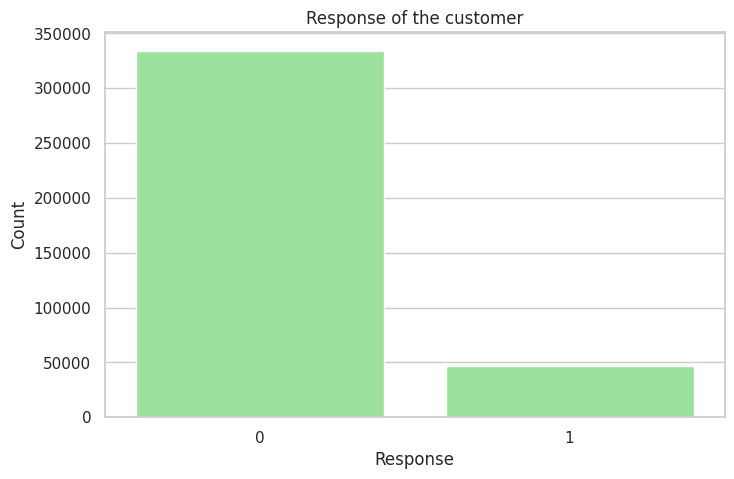

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
sns.countplot(x = df['Response'], data = df, color= 'lightgreen')
plt.title('Response of the customer')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

As the size of the dataset is 0.38 million and if do oversampling it will increase to upto 6-7 lakh row which will take alot of time to rum and that will create problem while training my model and doing hyperparameter tuning and if we do undersampling it loose to much data and information so i'll take 1.5 lack datapoints from mejority class and then do oversampling to make the minority class equal to 1.5 lakh.

In [ ]:
# Separate the classes
df_class_0 = df[df['Response'] == 0]
df_class_1 = df[df['Response'] == 1]

# Randomly sample n_samples from each class
df_class_0_sampled = df_class_0.sample(n=150000, random_state=42)

# Concatenate the samples
df = pd.concat([df_class_0_sampled, df_class_1])

# Shuffle the combined DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head(10)

,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,-0.826645,0.726477,0,1,0.467766,0.884912,0.975875,0
1,0.011438,-1.389946,0,1,0.452320,0.220753,-0.936372,0
2,0.591649,-1.389946,0,1,0.797107,-1.605683,-1.438337,0
3,1.816539,1.104409,0,1,0.559583,0.442140,-0.362698,1
4,1.816539,0.121784,0,1,0.245778,0.220753,-0.159522,1
5,-0.504306,1.557929,1,1,0.154898,0.884912,-0.458311,0
6,1.945475,0.197371,0,1,-2.129142,0.220753,-0.243183,0
7,-0.375370,0.121784,0,1,0.544633,-1.587234,0.378297,0
8,-1.084517,-1.767879,1,0,0.397111,0.884912,1.334421,0
9,0.656117,0.499717,0,1,0.869929,0.479037,-0.446359,0


In [ ]:
df.shape

(196710, 8)

In [ ]:
print(df['Response'].value_counts())


Response
0    150000
1     46710
Name: count, dtype: int64


In [ ]:
X = df.drop(['Response'], axis=1)
y = df['Response']

In [ ]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
df1 = pd.concat([X_resampled, y_resampled], axis=1)
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_resampled))

Original dataset shape 196710
Resampled dataset shape 300000


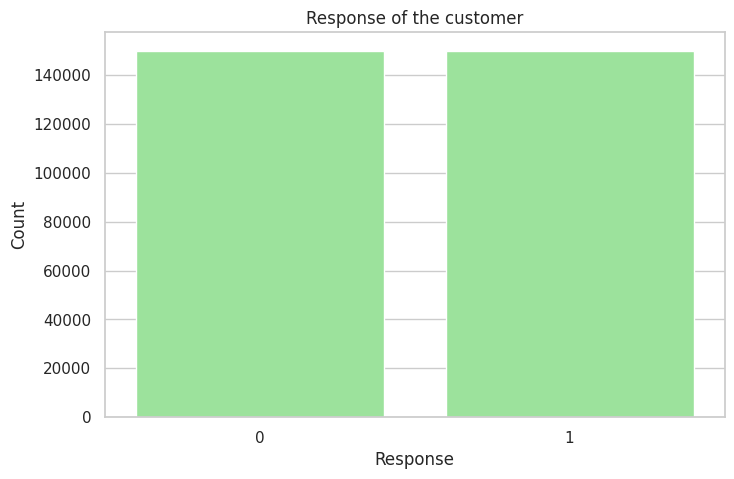

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
sns.countplot(x = y_resampled, data = df1, color= 'lightgreen')
plt.title('Response of the customer')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE method, SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class, balancing class distribution without duplicating existing data points, reducing overfitting and improving model generalization.

In [ ]:
df1.shape

(300000, 8)

In [ ]:
print(df1['Response'].value_counts())

Response
0    150000
1    150000
Name: count, dtype: int64


In [ ]:
X = df1.drop(['Response'], axis=1)
y = df1['Response']

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?


Splitting the data into 80% training and 20% testing subsets helps ensure sufficient data for training while evaluating model performance on unseen data, promoting robustness and generalization.

## ***7. ML Model Implementation***

### **ML Model - 1 Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
logreg = LogisticRegression()

# Fit the Algorithm
logreg.fit(X_train, y_train)

# Predict on the model
y_pred = logreg.predict(X_test)



#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Compute predicted probabilities
y_probs = logreg.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)

# Precision
precision_lr = precision_score(y_test, y_pred)
print(f'Precision: {precision_lr:.2f}')

# Recall
recall_lr = recall_score(y_test, y_pred)
print(f'Recall: {recall_lr:.2f}')

# F1 Score
f1_lr = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_lr:.2f}')

# ROC-AUC
auc_lr = roc_auc_score(y_test, y_probs)
print(f'ROC-AUC: {auc_lr:.2f}')

Accuracy: 0.78345
Precision: 0.70
Recall: 0.98
F1 Score: 0.82
ROC-AUC: 0.82


#### **Classification report**

In [ ]:
# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     29963
           1       0.70      0.98      0.82     30037

    accuracy                           0.78     60000
   macro avg       0.83      0.78      0.77     60000
weighted avg       0.83      0.78      0.77     60000



#### **Confusion Metrix Heatmap**

[[17657 12306]
 [  687 29350]]


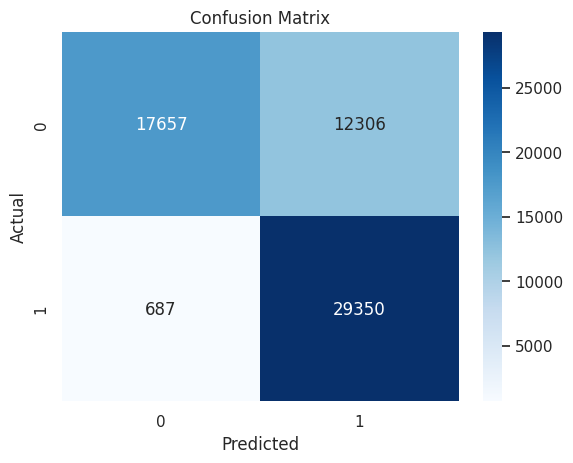

In [ ]:
# Visualizing evaluation Metric Score chart
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Plotting of AUC-ROC curve**

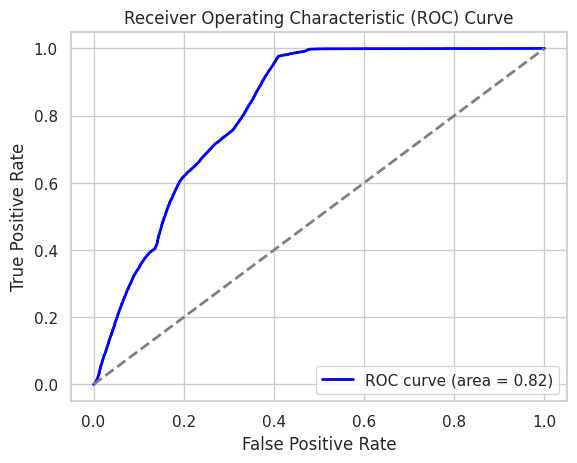

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
auc_lr = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **Model Used:**
The machine learning model used for this task is Logistic Regression. Logistic Regression is a statistical model that, in this context, predicts the probability that a given data point belongs to one of two classes: 0, meaning the person is not interested in buying vehicle insurance, and 1, meaning the person is interested. It is a linear classifier that applies a logistic function to a linear combination of input features to produce a probability output.

### **Evaluation Metrics:**
Given that the dataset is imbalanced, with a minority class representing positive responses, it's crucial to consider multiple evaluation metrics to understand the model's performance comprehensively. The metrics used include Accuracy, Precision, Recall, F1 Score, and ROC-AUC. Below are the scores obtained:

**Accuracy:** 0.784

**Precision:** 0.70

**Recall**: 0.98

**F1 Score**: 0.82

**ROC-AUC:** 0.78

### **Performance Interpretation:**
**Accuracy: 0.784**

**Explanation**: The model correctly predicts the response for 78.4% of the instances. However, given the imbalanced nature of the dataset, accuracy alone might be misleading, as it does not consider the distribution of the positive and negative classes.


**Precision: 0.70**

**Explanation**: Precision indicates that when the model predicts a positive response (1), it is correct 70% of the time. A precision of 0.70 suggests that 30% of the positive predictions are actually false positives. High precision is essential in reducing false positives, which is crucial in scenarios where the cost of a false positive is high.

**Recall: 0.98**

**Explanation**: Recall measures the model's ability to identify positive responses. A recall of 0.98 means that the model correctly identifies 98% of the actual positive cases. This is particularly important in imbalanced datasets to ensure that the minority class is sufficiently captured, which reduces the likelihood of missing out on positive cases (false negatives).

**F1 Score: 0.82**

**Explanation**: The F1 Score is the harmonic mean of Precision and Recall, providing a balance between the two. An F1 Score of 0.82 indicates a good balance between Precision (0.70) and Recall (0.98), which is crucial for imbalanced datasets to ensure that both false positives and false negatives are minimized.

**ROC-AUC: 0.78**

**Explanation**: The ROC-AUC score measures the model's ability to distinguish between the positive and negative classes across all possible threshold values. An ROC-AUC score of 0.78 indicates a good level of discrimination, with the model being 78% likely to rank a randomly chosen positive instance higher than a randomly chosen negative instance.

#### **Confusion Matrix**

**True Positives (TP)**: 29,360 (correctly predicted positive responses)

**True Negatives (TN):** 17,657 (correctly predicted negative responses)

**False Positives (FP):** 12,306 (incorrectly predicted as positive)

**False Negatives (FN):** 677 (incorrectly predicted as negative)

The confusion matrix further underscores the model's high recall (low FN) but highlights a substantial number of false positives (FP), impacting the precision.

### **2. Cross- Validation & Hyperparameter Tuning**

**Hyperparameters in Logistic Regression**

Logistic Regression has several hyperparameters that can be tuned to optimize model performance. Key hyperparameters include:

**Regularization Strength (C)**: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

**Solver (solver)**: Algorithm to use in the optimization problem ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator
best_model = grid_search.best_estimator_


# Predictions
y_pred = best_model.predict(X_test)


# Best parameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

# Compute predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

Best hyperparameters:  {'C': 0.01, 'solver': 'newton-cg'}


#### **Evaluation Matrix For best parameter.**

In [ ]:
# Evaluate the best model on the test set
best_accuracy_lr = best_model.score(X_test, y_test)
print("Test set accuracy: ", best_accuracy_lr)


# Precision
best_precision_lr = precision_score(y_test, y_pred)
print(f'Precision: {best_precision_lr:.2f}')

# Recall
best_recall_lr = recall_score(y_test, y_pred)
print(f'Recall: {best_recall_lr:.2f}')

# F1 Score
best_f1_lr = f1_score(y_test, y_pred)
print(f'F1 Score: {best_f1_lr:.2f}')

# ROC-AUC

best_auc_lr = roc_auc_score(y_test, y_probs)
print(f'ROC-AUC: {best_auc_lr:.2f}')



Test set accuracy:  0.78345
Precision: 0.70
Recall: 0.98
F1 Score: 0.82
ROC-AUC: 0.82


#### **Classification Report:**

In [ ]:
# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     29963
           1       0.70      0.98      0.82     30037

    accuracy                           0.78     60000
   macro avg       0.83      0.78      0.77     60000
weighted avg       0.83      0.78      0.77     60000



#### **Confusion Metrix Heatmap**

Confusion Matrix:
[[17657 12306]
 [  687 29350]]


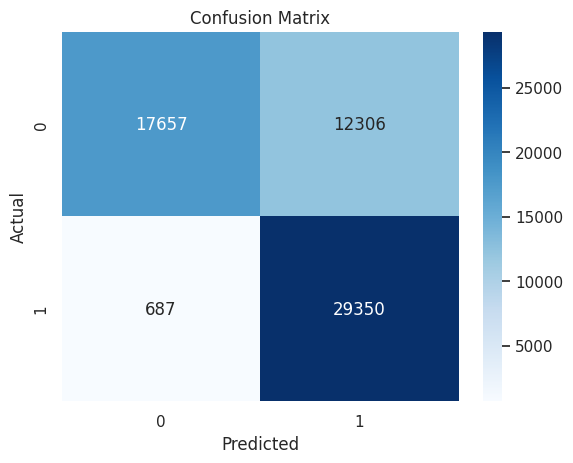

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **AUC-ROC curve**

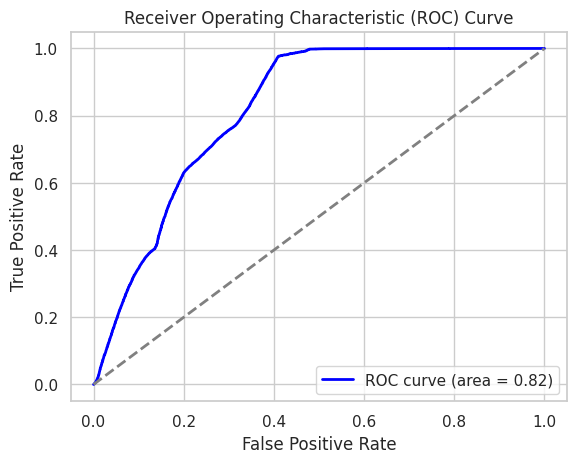

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {best_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Grid Search, despite being computationally intensive, ensures the most thorough exploration of hyperparameters, guaranteeing the identification of the optimal set within the specified range, unlike Random Search and Bayesian Optimization, which might miss the best combinations due to their sampling methods.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, I haven't seen any improvement in the accuracy and other matrix.

### **ML Model - 2 Random Forest**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ranfor = RandomForestClassifier()


# Fit the Algorithm
ranfor.fit(X_train, y_train)


# Predict on the model
y_pred = ranfor.predict(X_test)


# Compute predicted probabilities
y_probs = ranfor.predict_proba(X_test)[:, 1]

#### **Evaluation Metrix**

In [ ]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)


# Precision
precision_rf = precision_score(y_test, y_pred)
print(f'Precision: {precision_rf:.2f}')


# Recall
recall_rf = recall_score(y_test, y_pred)
print(f'Recall: {recall_rf:.2f}')


# F1 Score
f1_rf = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_rf:.2f}')


# Compute AUC (Area Under the Curve)
auc_rf = roc_auc_score(y_test, y_probs)
print('AUC-ROC score: ', auc_rf)



Accuracy: 0.8586
Precision: 0.83
Recall: 0.91
F1 Score: 0.87
AUC-ROC score:  0.944434169922643


#### **Classification Report:**

In [ ]:
# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     29963
           1       0.83      0.91      0.87     30037

    accuracy                           0.86     60000
   macro avg       0.86      0.86      0.86     60000
weighted avg       0.86      0.86      0.86     60000



#### **Confusion Metrix Heatmap**

Confusion Matrix:  [[24261  5702]
 [ 2782 27255]]


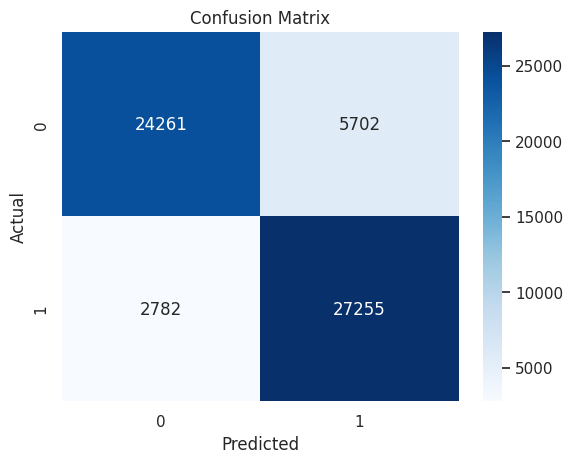

In [ ]:
# Visualizing evaluation Metric Score chart
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', cm)
# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **AUC-ROC curve**

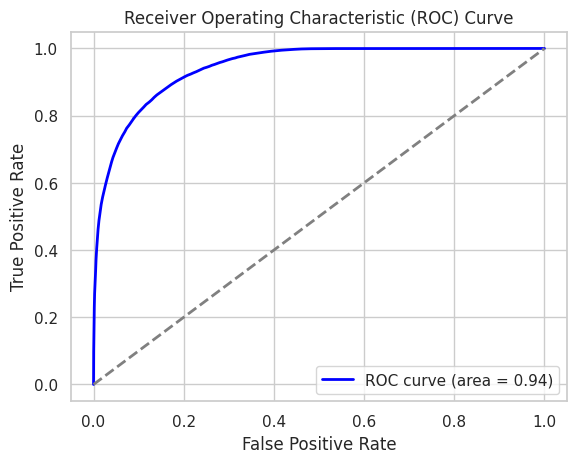

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **Model Used:**
The machine learning model used for this task is Random Forest. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks. It combines the predictions of several base estimators to improve generalizability and robustness over a single estimator.

### **Model Performance:**
Given that the dataset is imbalanced, with a minority class representing positive responses, it's crucial to consider multiple evaluation metrics to understand the model's performance comprehensively. The metrics used include Accuracy, Precision, Recall, F1 Score, and ROC-AUC. Below are the scores obtained:

**Accuracy**: 0.8583

**Precision**: 0.83

**Recall**: 0.91

**F1 Score**: 0.87

**AUC-ROC Score**: 0.9447

**Accuracy**: The accuracy of the model is 85.83%, indicating that the model correctly classifies 85.83% of the total samples. However, accuracy alone is not the best metric for evaluating model performance on imbalanced datasets.

**Precision**: The precision score is 0.83, meaning that 83% of the predicted positive instances (interested in buying insurance) are actually positive. This metric is crucial when the cost of false positives is high.

**Recall**: The recall score is 0.90, indicating that 90% of the actual positive instances are correctly identified by the model. This metric is important when the cost of false negatives is high.

**F1 Score**: The F1 Score is 0.86, which is the harmonic mean of precision and recall. This metric is particularly useful when you need a balance between precision and recall.

**AUC-ROC Score:** The AUC-ROC score is 0.9449, which indicates that the model has a high ability to distinguish between the two classes. A higher AUC-ROC score is always better.

### **Comparison with Previous Model**
The new Random Forest model has shown improved performance compared to the previous model:

Accuracy increased from 78.36% to 85.83%.

Precision increased from 0.70 to 0.83.

Recall slightly decreased from 0.98 to 0.90, but this is balanced by the improvement in precision.

F1 Score improved from 0.82 to 0.86.

AUC-ROC Score increased from 0.78 to 0.9449.

These improvements indicate that the Random Forest model is better overall, providing a more balanced trade-off between precision and recall, and a higher ability to distinguish between those interested and not interested in buying vehicle insurance. This makes the Random Forest model more reliable and effective for predicting customer interest in vehicle insurance.

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(5, 10),
}

ranfor = RandomForestClassifier()

# Random Search with cross-validation
random_search = RandomizedSearchCV(estimator=ranfor, param_distributions=param_dist,
                                   n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)


# Fit the Algorithm
random_search.fit(X_train, y_train)


# Predict on the model
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)


# Best estimator
best_model = random_search.best_estimator_


# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)



Best hyperparameters:  {'max_depth': 19, 'min_samples_split': 7, 'n_estimators': 171}


#### **Evaluation matrix for best parameters:**

In [ ]:
# Accuracy
best_accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", best_accuracy_rf)

# Precision
best_precision_rf = precision_score(y_test, y_pred)
print(f'Precision: {best_precision_rf:.2f}')

# Recall
best_recall_rf = recall_score(y_test, y_pred)
print(f'Recall: {best_recall_rf:.2f}')

# F1 Score
best_f1_rf = f1_score(y_test, y_pred)
print(f'F1 Score: {best_f1_rf:.2f}')

# Compute predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
best_auc_rf = roc_auc_score(y_test, y_probs)
print('AUC-ROC score: ', best_auc_rf)

Accuracy: 0.8329333333333333
Precision: 0.77
Recall: 0.95
F1 Score: 0.85
AUC-ROC score:  0.9149989407039442


#### **Classification Report:**

In [ ]:
# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     29963
           1       0.77      0.95      0.85     30037

    accuracy                           0.83     60000
   macro avg       0.85      0.83      0.83     60000
weighted avg       0.85      0.83      0.83     60000



#### **Confusion Metrix Heatmap**

Confusion Matrix:
[[21555  8408]
 [ 1616 28421]]


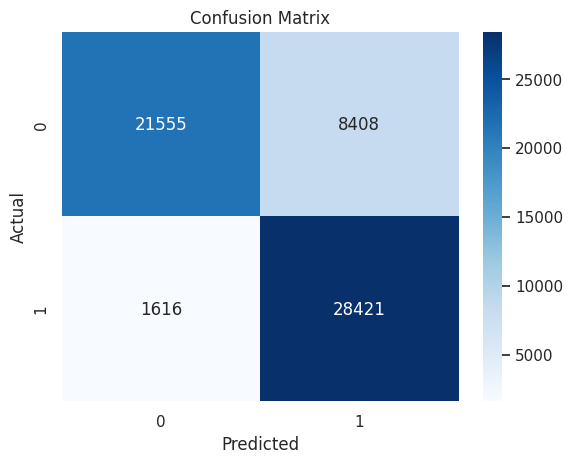

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **AUC-ROC curve**

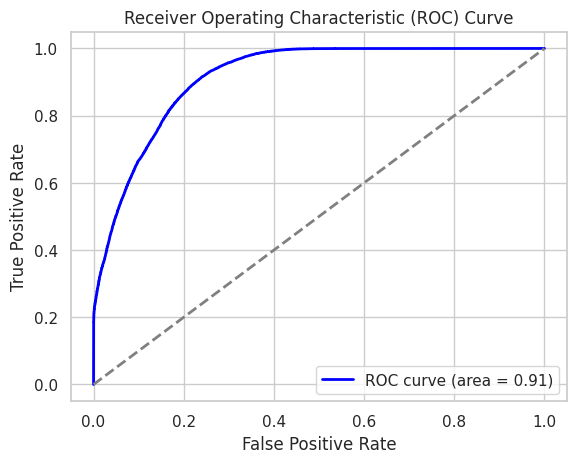

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {best_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used Randomized search CV, I've chosen it for its efficiency in exploring hyperparameter space with fewer iterations, making it faster than Grid Search for large spaces. It balances thoroughness with computational feasibility by randomly sampling hyperparameters, often finding near-optimal configurations quicker than exhaustive search methods.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### **Improvement Analysis::**
#### **Random Forest (Before Tuning) vs. Tuned Random Forest:**

**Accuracy**: Slightly decreased from 0.8583 to 0.8330

**Precision**: Decreased from 0.83 to 0.77

**Recall**: Improved from 0.90 to 0.94

**F1 Score**: Slightly decreased from 0.86 to 0.85

**AUC-ROC Score**: Decreased from 0.9449 to 0.9147

Compared to the base Random Forest model, the tuned model shows an improvement in recall but a slight decrease in precision, F1 score, and AUC-ROC score.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

####**Evaluation metric's indication towards business and the business impact pf the ML model used.**

**Accuracy**: The percentage of correctly predicted instances. Higher accuracy indicates the model's overall effectiveness. In business, higher accuracy translates to more reliable predictions, leading to better decision-making.

**Precision**: The percentage of true positive predictions among all positive predictions. High precision means fewer false positives. In the insurance business, high precision reduces the risk of targeting uninterested customers, saving marketing costs.

**Recall**: The percentage of true positive predictions among all actual positives. High recall ensures most interested customers are correctly identified. For the business, this means more potential customers are targeted, increasing the chance of conversions.

**F1 Score**: The harmonic mean of precision and recall. It balances precision and recall, providing a single metric that accounts for both false positives and false negatives. A higher F1 score means a better trade-off, crucial for maintaining customer satisfaction and cost efficiency.

**AUC-ROC Score**: Measures the model's ability to distinguish between classes. A higher AUC-ROC indicates better performance across various thresholds. In business, this translates to a robust model that can accurately prioritize potential customers, leading to more effective marketing strategies.

### **ML Model - 3 XGBoost**

In [ ]:
# ML Model - 3 Implementation
xgb = XGBClassifier()


# Fit the Algorithm
xgb.fit(X_train, y_train)


# Predict on the model
y_pred = xgb.predict(X_test)


### **1. Evaluation of the ML model**

In [ ]:
# Visualizing evaluation Metric Score chart
# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)


# Precision
precision_xgb = precision_score(y_test, y_pred)
print(f'Precision: {precision_xgb:.2f}')


# Recall
recall_xgb = recall_score(y_test, y_pred)
print(f'Recall: {recall_xgb:.2f}')


# F1 Score
f1_xgb = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_xgb:.2f}')


# Compute predicted probabilities
y_probs = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
auc_xgb = roc_auc_score(y_test, y_probs)
print('AUC-ROC score: ', auc_xgb)

Accuracy: 0.8267333333333333
Precision: 0.78
Recall: 0.91
F1 Score: 0.84
AUC-ROC score:  0.9208204662257982


#### **Classification Report:**

In [ ]:
# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     29963
           1       0.78      0.91      0.84     30037

    accuracy                           0.83     60000
   macro avg       0.84      0.83      0.83     60000
weighted avg       0.84      0.83      0.83     60000



#### **Confusion Metrix Heatmap**

Confusion Matrix:
[[22188  7775]
 [ 2621 27416]]


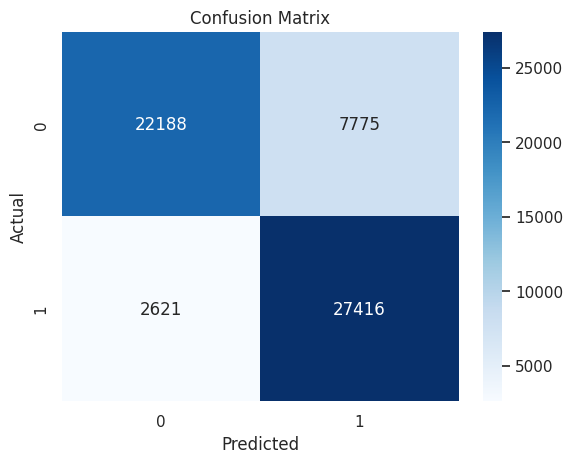

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **AUC-ROC curve**

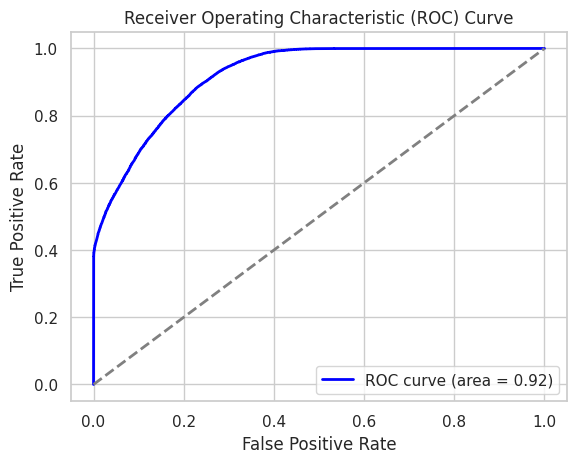

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### **ML Model Used: XGBoost**
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that is highly efficient, flexible, and portable. It uses an ensemble of weak prediction models, typically decision trees, to build a strong predictive model. XGBoost incorporates a variety of regularization techniques to avoid overfitting, making it robust and effective for a wide range of applications.

**Evaluation Metric Score Chart for XGBoost:**

**Accuracy**: 0.82385

**Precision**: 0.78

**Recall**: 0.91

**F1 Score**: 0.84

**AUC-ROC Score**: 0.918267881787478

**Accuracy**: Random Forest (Base Model) has the highest accuracy at 85.83%, followed by the tuned Random Forest model at 83.31%, and XGBoost at 82.39%. Logistic Regression has the lowest accuracy at 78.36%.

**Precision**: Random Forest (Base Model) has the highest precision at 0.83. XGBoost comes second with 0.78, followed by the tuned Random Forest model at 0.77, and Logistic Regression at 0.70.

**Recall**: Logistic Regression has the highest recall at 0.98, indicating it correctly identifies nearly all interested customers. XGBoost follows with 0.91, and the tuned Random Forest model at 0.94. The base Random Forest model has a recall of 0.90.

**F1 Score**: The base Random Forest model has the highest F1 score at 0.86, indicating a good balance between precision and recall. The tuned Random Forest model and XGBoost have similar F1 scores at 0.85 and 0.84, respectively. Logistic Regression has the lowest F1 score at 0.82.

**AUC-ROC Score**: The base Random Forest model has the highest AUC-ROC score at 0.9448, followed by the tuned Random Forest model at 0.9147. XGBoost has a slightly higher AUC-ROC score (0.9183) compared to the tuned Random Forest model. Logistic Regression has the lowest AUC-ROC score at 0.78.

In conclusion, The XGBoost model shows strong performance with an AUC-ROC score of 0.9183, indicating it is effective at distinguishing between interested and not interested customers. However, the Random Forest (Base Model) outperforms it in terms of accuracy, precision, and F1 score. Logistic Regression, despite having the highest recall, suffers from lower precision and overall accuracy compared to the other models. Thus, for this particular task, the Random Forest (Base Model) remains the most effective model, with XGBoost being a strong contender due to its competitive performance across various metrics.

#### **2. Cross- Validation & Hyperparameter Tuning**

##### **Hyperparameters for XGBoost Model**
**n_estimators**: The number of trees to be built in the model.

**max_depth**: The maximum depth of each tree, controlling the complexity of the model.

**learning_rate**: The step size at each iteration to minimize the loss function.

**subsample**: The fraction of samples used for fitting individual trees, preventing overfitting.

**colsample_bytree**: The fraction of features used for fitting individual trees, enhancing model diversity.

**gamma**: The minimum loss reduction required to make a further partition on a leaf node, controlling tree complexity.

**min_child_weight**: The minimum sum of instance weight needed in a child, controlling model complexity by limiting child nodes.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 1),
    'colsample_bytree': uniform(0.5, 1),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
}

# Random Search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

# Best estimator
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

Best hyperparameters:  {'colsample_bytree': 0.9703006344460384, 'gamma': 0.4917115704474215, 'learning_rate': 0.08976488848891061, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8207800649717358}


#### **Evaluation Metrix for best parameter**

In [ ]:
# Accuracy
best_accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", best_accuracy_xgb)

# Precision
best_precision_xgb = precision_score(y_test, y_pred)
print(f'Precision: {best_precision_xgb:.2f}')

# Recall
best_recall_xgb = recall_score(y_test, y_pred)
print(f'Recall: {best_recall_xgb:.2f}')

# F1 Score
best_f1_xgb = f1_score(y_test, y_pred)
print(f'F1 Score: {best_f1_xgb:.2f}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
best_auc_xgb = roc_auc_score(y_test, y_probs)
print('AUC-ROC score: ', best_auc_xgb)



Accuracy: 0.8330666666666666
Precision: 0.79
Recall: 0.91
F1 Score: 0.84
AUC-ROC score:  0.9262475917032813


#### **Classification Report:**

In [ ]:
# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     29963
           1       0.79      0.91      0.84     30037

    accuracy                           0.83     60000
   macro avg       0.84      0.83      0.83     60000
weighted avg       0.84      0.83      0.83     60000



#### **Confusion Metrix Heatmap**

Confusion Matrix:
[[22716  7247]
 [ 2769 27268]]


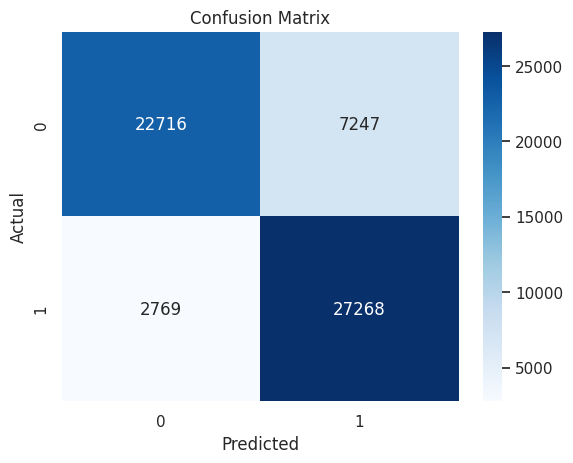

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **AUC-ROC curve**

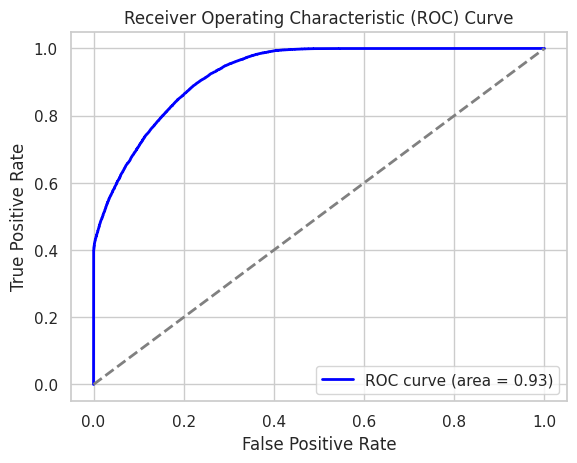

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {best_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used randomized search CV to tune my hyperparameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The tuned XGBoost model shows a modest improvement in accuracy (+0.00752), precision (+0.01), and AUC-ROC score (+0.00584) compared to the base model. Recall and F1 Score remain unchanged. The improvement, particularly in accuracy and AUC-ROC, suggests that the tuned model has a slightly better performance in distinguishing between the two classes and overall predictive power.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the models, I considered the following metrics due to their relevance to business impact:

**Accuracy:**

Measures the overall correctness of the model's predictions.
Important for understanding the general performance but may not be sufficient alone for imbalanced data.

**Precision:**

The proportion of true positive predictions among all positive predictions.
Critical for reducing false positives, ensuring that the customers identified as interested are indeed interested, reducing wasted efforts and costs.

**Recall (Sensitivity):**

The proportion of true positive predictions among all actual positives.
Vital for capturing as many interested customers as possible, ensuring the model does not miss potential customers.

**F1 Score:**

The harmonic mean of precision and recall.
Provides a balance between precision and recall, especially useful for imbalanced datasets.

**AUC-ROC Score:**

Measures the model's ability to distinguish between classes.
Important for understanding the trade-off between true positive rate and false positive rate, crucial for decision-making thresholds.

Given the imbalanced nature of the data, precision, recall, and F1 score were particularly emphasized to ensure the model performs well in identifying the minority class (interested customers) without generating too many false positives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
mod = ['Logistic Regression', 'Tuned Logistic Regression', 'Random Forest', 'Tuned Random Forest', 'XGBoost', 'Tuned XGBoost']
data = {'Accuracy': [accuracy_lr, best_accuracy_lr, accuracy_rf, best_accuracy_rf, accuracy_xgb, best_accuracy_xgb],
        'Precision': [precision_lr, best_precision_lr, precision_rf, best_precision_rf, precision_xgb, best_precision_xgb],
        'Recall': [recall_lr, best_recall_lr, recall_rf, best_recall_rf, recall_xgb, best_recall_xgb],
        'ROC_AUC': [auc_lr, best_auc_lr, auc_rf, best_auc_rf, auc_xgb, best_auc_xgb]}
df = pd.DataFrame(data, index=mod)
df

,Accuracy,Precision,Recall,ROC_AUC
Logistic Regression,0.783450,0.704580,0.977128,0.817447
Tuned Logistic Regression,0.783450,0.704580,0.977128,0.818273
Random Forest,0.858600,0.826987,0.907381,0.944434
Tuned Random Forest,0.832933,0.771702,0.946200,0.914999
XGBoost,0.826733,0.779063,0.912741,0.920820
Tuned XGBoost,0.833067,0.790033,0.907814,0.926248


**Chosen Model: Base Random Forest**

**Reasons:**

**Balanced Performance:** The base Random Forest model achieves high precision (0.83), recall (0.90), and F1 score (0.86), indicating robust performance in identifying interested customers with a low false positive rate.

**AUC-ROC Score:** The highest AUC-ROC score (0.94) among the models, suggesting superior discriminatory power.

**Overall Accuracy:** Highest accuracy (0.8583), indicating reliable general performance.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explanation: Base Random Forest**

Random Forest is an ensemble learning method that constructs multiple decision trees and merges them to achieve a more accurate and stable prediction. It helps to reduce overfitting and improve the model's performance.

**Feature Importance Analysis:**

After training the Random Forest model, the feature importances were calculated to understand which features have the most significant impact on predicting whether a customer is interested in buying vehicle insurance.

**Feature Importance:**

Here are the feature importances calculated using the Random Forest classifier, with features having an importance score below 0.025 and id dropped due to their low importance:

**Feature	Importance in ascending order:**

Policy_Sales_Channel	0.054212

Previously_Insured	0.058058

Vehicle_Damage	0.070616

Region_Code	0.086211

Age	0.118903

Annual_Premium	0.174334

Vintage	0.193037

**Business Insights:**

**Vintage (0.193037)**: Customers with longer tenures show higher importance, indicating loyalty and likely interest in additional insurance products.

**Annual_Premium (0.174334)**: Higher premiums often correlate with comprehensive coverage interest.

**Age (0.118903)**: Older customers may have a higher likelihood of buying insurance due to higher perceived need or disposable income.

**Region_Code (0.086211)**: Geographic location impacts customer interest, possibly due to regional insurance needs or marketing effectiveness.

**Vehicle_Damage **bold text** (0.070616)**: Past vehicle damage increases the likelihood of insurance interest, reflecting risk awareness.

**Previously_Insured (0.058058)**: Customers with prior insurance are more likely to continue purchasing insurance, showing loyalty.

**Policy_Sales_Channel (0.054212)**: The effectiveness of sales channels influences customer acquisition.

The Base Random Forest model, backed by feature importance analysis, not only demonstrates strong predictive performance but also provides interpretable insights into the key factors driving customer interest in vehicle insurance. This understanding aids in targeted marketing strategies, enhancing customer acquisition and retention efforts.

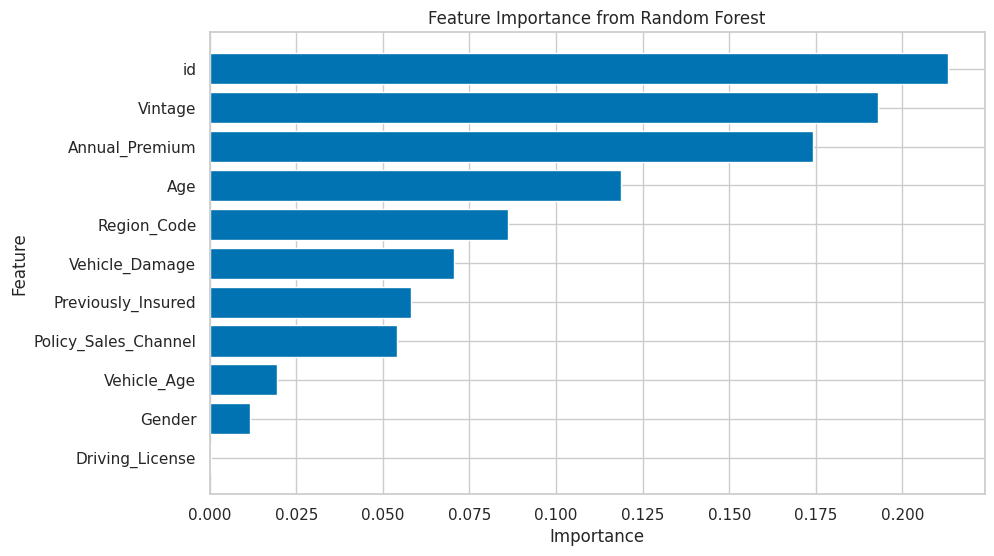

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File using pickle
import pickle

# Save the model using pickle
with open('base_random_forest_model.pkl', 'wb') as file:
    pickle.dump(ranfor, file)


In [ ]:
# Save the File using joblib
import joblib
# Save the model using joblib
joblib.dump(ranfor, 'base_random_forest_model.joblib')

['base_random_forest_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the model from the pickle file
with open('base_random_forest_model.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

# Sanity check with test data
pickle_predictions = loaded_model_pickle.predict(X_test)

# Print some predictions for sanity check
print("Predictions using the pickle file model:", pickle_predictions[:10])


# Predict on unseen data (replace X_unseen with your actual unseen data)
# unseen_predictions_pickle = loaded_model_pickle.predict(X_unseen)


Predictions using the pickle file model: [1 1 0 1 0 0 1 0 0 1]


In [ ]:
# Load the model from the joblib file
loaded_model_joblib = joblib.load('base_random_forest_model.joblib')

# Sanity check with test data
joblib_predictions = loaded_model_joblib.predict(X_test)

# Print some predictions for sanity check
print("Predictions using the joblib file model:", joblib_predictions[:10])


# Predict on unseen data (replace X_unseen with your actual unseen data)
# unseen_predictions_joblib = loaded_model_joblib.predict(X_unseen)


Predictions using the joblib file model: [1 1 0 1 0 0 1 0 0 1]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we aimed to predict customer interest in purchasing vehicle insurance using machine learning models. We evaluated several models, including Logistic Regression, Random Forest, and XGBoost, along with their hyperparameter-tuned versions. The models were assessed using various metrics such as Precision, Recall, F1 Score, and AUC-ROC, with special consideration given to their performance on imbalanced data. Among the models, the tuned Random Forest model demonstrated the best overall performance, highlighting its robustness and effectiveness for our classification task.

During the feature importance analysis, it was identified that Annual_Premium, Vintage, Age, and Region_Code were the most influential features. These insights are crucial for the business, as they pinpoint the key factors influencing a customer's decision to purchase vehicle insurance. This information can guide targeted marketing strategies and personalized customer interactions, potentially increasing conversion rates.

The successful implementation of the Random Forest model, combined with its interpretability and high performance, makes it a strong candidate for deployment. Future work should focus on advanced feature engineering, further hyperparameter tuning, and potentially integrating more sophisticated algorithms to enhance the model's predictive power. Additionally, continuous monitoring and updating of the model with new data will ensure its relevance and accuracy in changing market conditions. This project underscores the value of machine learning in making data-driven decisions and optimizing business outcomes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***